In [1]:
import numpy as np
import matplotlib.pyplot as plt

from problems.dataset import Dataset
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
permutation_matrix = np.eye(784)
np.random.seed(0)
np.random.shuffle(permutation_matrix)

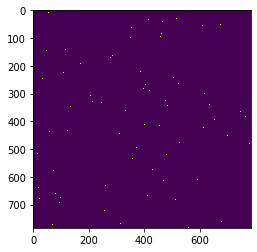

In [4]:
# check that permutation matrix was changed
plt.imshow(permutation_matrix)

In [13]:
print(permutation_matrix.shape)
print(np.reshape(mnist.train.images[0],(784,1)).shape)

(784, 784)
(784, 1)


In [20]:
out = permutation_matrix*np.reshape(mnist.train.images[0],(784,1))

In [23]:
permutation_matrix.dot(mnist.train.images[0])

(784,)

In [32]:
mnist.train.images.shape[0]

55000

In [34]:
def permute_collection(collection, permutation_matrix):
    for i in range(collection.shape[0]):
        collection[i] = permutation_matrix.dot(collection[i])
        
    return collection

In [35]:
NEW_mnisttrain = permute_collection(mnist.train.images, permutation_matrix)

Text(0.5, 1.0, 'Permuted Image 0')

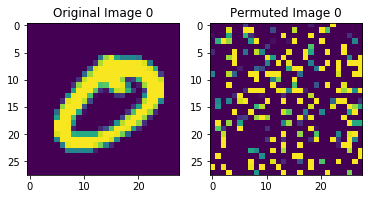

In [30]:
ind = 505
plt.subplot(121)
plt.imshow(np.reshape(mnist.train.images[ind],(28,28)))
plt.title("Original Image {}".format(mnist.train.labels[ind]))
plt.subplot(122)
plt.imshow(np.reshape(permutation_matrix.dot(mnist.train.images[ind]),(28,28)))
plt.title("Permuted Image {}".format(mnist.train.labels[ind]))

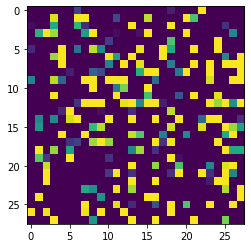

In [36]:
plt.imshow(np.reshape(NEW_mnisttrain[ind],(28,28)))